# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## **Creating data to view and fit**

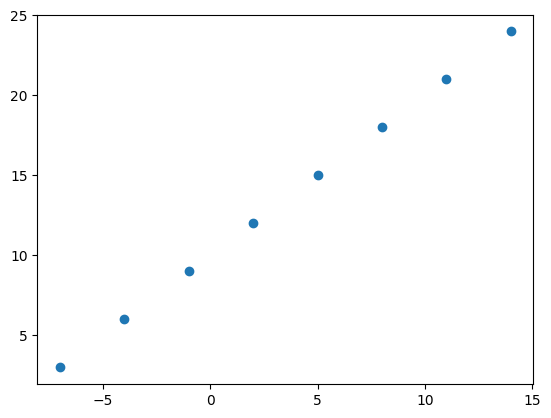

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## **Input and output shapes**

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors with dtype float 32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

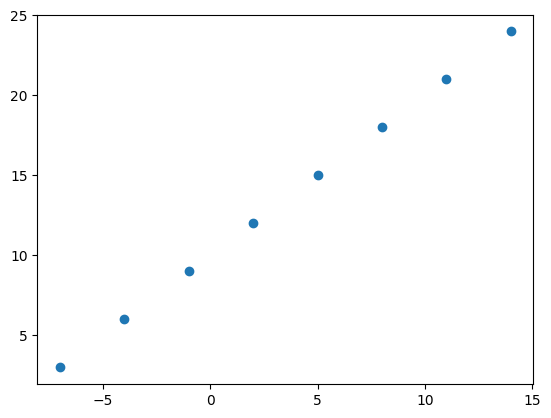

In [11]:
plt.scatter(X, y);

## **Steps in modelling with TensorFlow**

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how woring it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find the patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 922ms/step - loss: 21.1073 - mae: 21.1073
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 20.7142 - mae: 20.7142
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 20.3664 - mae: 20.3664
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 20.0851 - mae: 20.0851
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 19.8039 - mae: 19.8039


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 190ms/step


array([[-21.976803]], dtype=float32)

## **Improving our model**

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 508ms/step - loss: 20.4233 - mae: 20.4233
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 20.1420 - mae: 20.1420
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 19.8608 - mae: 19.8608
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 19.5795 - mae: 19.5795
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 19.2983 - mae: 19.2983
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 19.0170 - mae: 19.0170
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 18.7358 - mae: 18.7358
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 18.4545 - mae: 18.4545
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 18.1733 - mae: 18.1733
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 17.8920 - mae: 17.8920
Epoch 11/100
1/1 [==============================

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 152ms/step


array([[29.300684]], dtype=float32)

In [18]:
# Let's see if we can make another change to improve our model

# 1. Create a model (this time with an extra hidden layer with 100 hidden neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.4942 - mae: 14.4942
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 13.9933 - mae: 13.9933
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 13.5115 - mae: 13.5115
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 13.0414 - mae: 13.0414
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 12.5739 - mae: 12.5739
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 12.1030 - mae: 12.1030
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 11.6238 - mae: 11.6238
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 11.1390 - mae: 11.1390
Epoch 9/100
1/1 [==============================] - 0s 62ms/step - loss: 10.6403 - mae: 10.6403
Epoch 10/100
1/1 [==============================] - 0s 57ms/step - loss: 10.1236 - mae: 10.1236
Epoch 11/100
1/1 [==============================] -

In [19]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's predict
model.predict([17.0])

1/1 [==============================] - 0s 375ms/step


array([[31.711092]], dtype=float32)

In [21]:
# Another model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 11.9666 - mae: 11.9666
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 11.8817 - mae: 11.8817
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 11.7968 - mae: 11.7968
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 11.7120 - mae: 11.7120
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 11.6271 - mae: 11.6271
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5421 - mae: 11.5421
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 11.4572 - mae: 11.4572
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 11.3722 - mae: 11.3722
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2871 - mae: 11.2871
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2021 - mae: 11.2021
Epoch 11/100
1/1 [==============================] -

In [22]:
# Let's predict
model.predict([17.0])

1/1 [==============================] - 0s 106ms/step


array([[29.89563]], dtype=float32)

## **Evaluating a model**

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 workds you should memorize:

> "Visualie, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

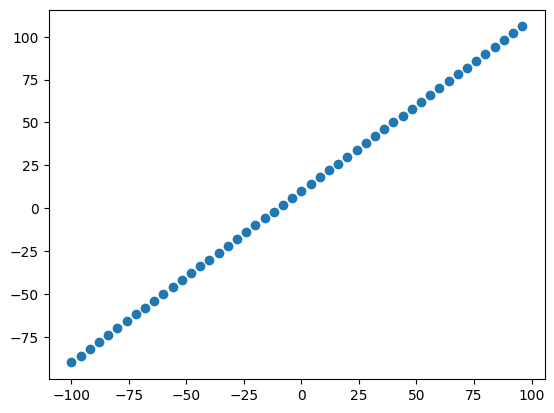

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y);

### **The 3 sets...**


* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned. This set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### **Visualizing the data**

Now we've got our data in training and test sets... let's visualize it again.

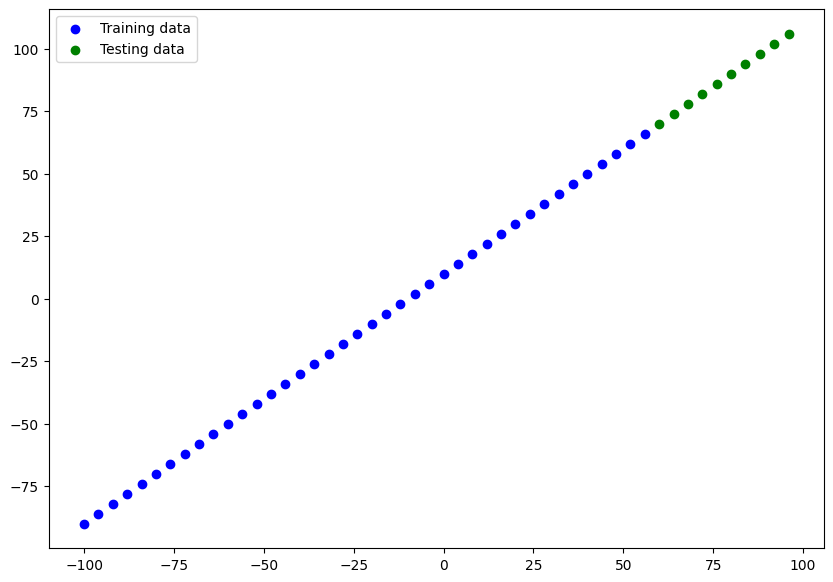

In [28]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

### **Visualizing the model**

In [31]:
model.summary()

ValueError: ignored

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layers")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can updatae as it trains.
* **Non-trainanble params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [34]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [35]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


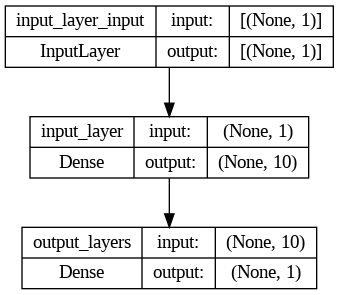

In [36]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

### **Visualizing our model's predictions**

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_preds` (ground truth versus your model).

In [37]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 85ms/step


array([[ 69.58241 ],
       [ 74.10857 ],
       [ 78.63472 ],
       [ 83.16089 ],
       [ 87.687035],
       [ 92.2132  ],
       [ 96.73936 ],
       [101.2655  ],
       [105.79167 ],
       [110.317825]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn in into a function.

In [39]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

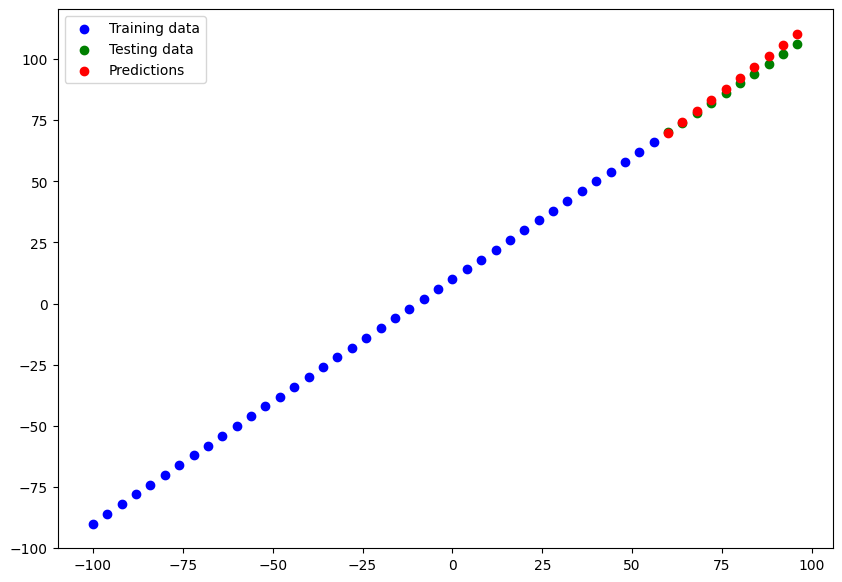

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### **Evaluating our model's predictions with regression evaluation metrics**

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "average the squared errors"

In [41]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 169ms/step - loss: 2.0336 - mae: 2.0336


[2.0336341857910156, 2.0336341857910156]

In [42]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.417587, 14.73486 , 12.146112, 10.567822, 10.      , 10.44264 ,
       11.895742, 14.359302, 17.833338, 22.317825], dtype=float32)>

In [43]:
tf.squeeze(tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.58241 ,  74.10857 ,  78.63472 ,  83.16089 ,  87.687035,
        92.2132  ,  96.73936 , 101.2655  , 105.79167 , 110.317825],
      dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0336356>

In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.0869026>

In [47]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### **Running experiments to improve our model**

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [48]:
# Set random seed
tf.random.set_seed(42)

In [49]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 12.3989 - mae: 12.3989
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4768 - mae: 9.4768
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0409 - mae: 12.0409
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 8.7550 - mae: 8.7550
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.9731 - mae: 10.9731
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1384 - mae: 10.1384
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1619 - mae: 9.1619
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1138 - mae: 9.1138
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 15.1870 - mae: 15.1870
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8261 - mae: 7.8261
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

1/1 [==============================] - 0s 271ms/step


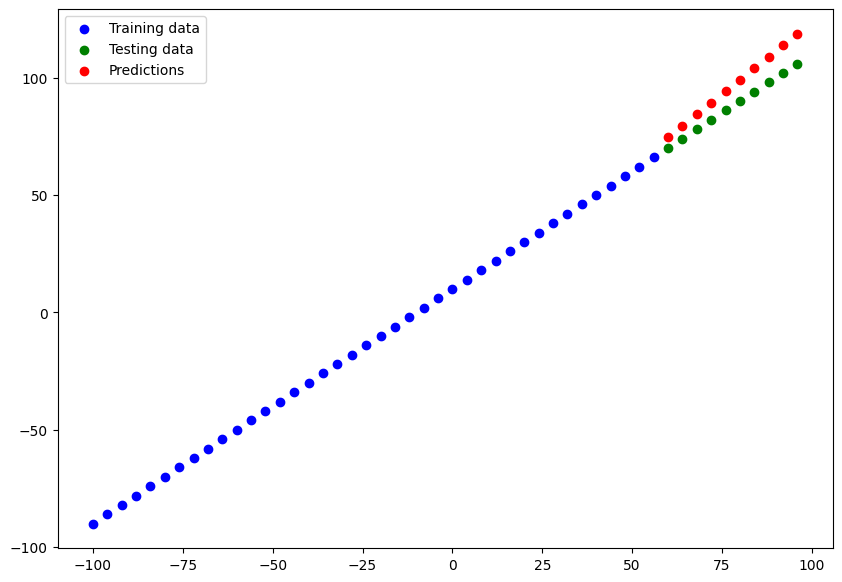

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.659795>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.524826>)

**Build `model_2**

* 2 dense layers, traind for 100 epochs

In [68]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 38.1050 - mse: 2157.2810
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 23.4944 - mse: 709.2558
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 28.7619 - mse: 1232.9825
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 27.4208 - mse: 1109.5570
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9444 - mse: 281.3931
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8764 - mse: 168.8055
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1910 - mse: 151.1275
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0760 - mse: 160.3336
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.4723 - mse: 2585.9700
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8682 - mse: 1094.4041
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 80ms/step


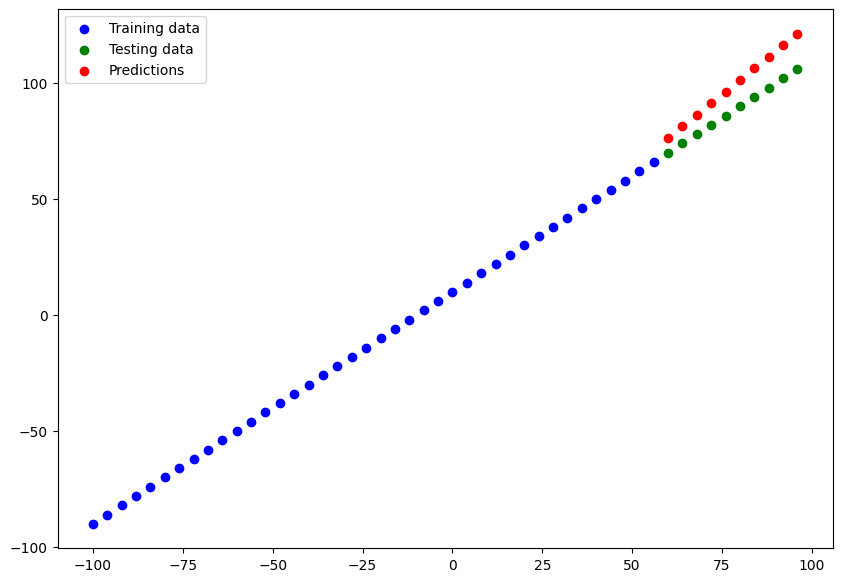

In [69]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [70]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.858361>,
 <tf.Tensor: shape=(), dtype=float32, numpy=125.83142>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 22ms/step - loss: 63.9929 - mae: 63.9929
Epoch 2/500
2/2 [==============================] - 0s 17ms/step - loss: 21.6088 - mae: 21.6088
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 19.1243 - mae: 19.1243
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 13.8577 - mae: 13.8577
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.3609 - mae: 15.3609
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1968 - mae: 12.1968
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.4924 - mae: 11.4924
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2145 - mae: 11.2145
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 41.8484 - mae: 41.8484
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.0641 - mae: 29.0641
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 76ms/step


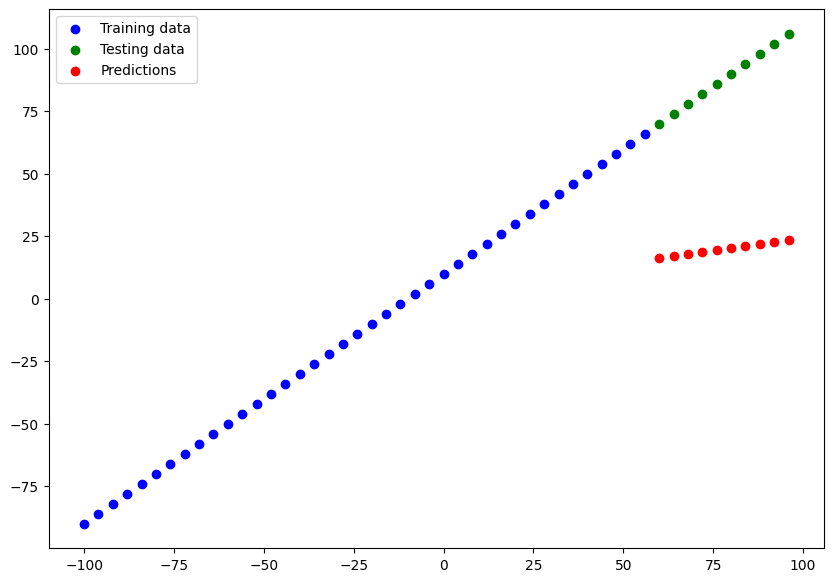

In [56]:
# Make and predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_true=y_test, y_pred=y_preds_3)
mse_3 = mse(y_true=y_test, y_pred=y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.09497>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4721.8096>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## **Comparing the results of our experiments**

We've run a few experiments, let's compare the results.

In [71]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.659795,81.524826
1,model_2,10.858361,125.831421
2,model_3,68.094971,4721.809570


Looks like `model_2` performed the best...

In [72]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## **Tracking your experiments**

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## **Saving our models**

Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models, too:
1. The SavedModel format
2. The HDF5 format

In [73]:
filepath = "drive/MyDrive/TensorFlowDeveloperCertificate/"

In [ ]:
# Save model using the SavedModel format
model_2.save("drive/MyDrive/TensorFlowDeveloperCertificate/best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("drive/MyDrive/TensorFlowDeveloperCertificate/best_model_HDF5_format.h5")

## **Loading a Saved model**

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model(filepath + "best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

In [ ]:
# Load in the HDF5 format model
loaded_HDF5_format = tf.keras.models.load_model(filepath + "best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

In [ ]:
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
model_2_preds == loaded_HDF5_format_preds

## **A larger example**

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("drive/MyDrive/TensorFlowDeveloperCertificate/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [5]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# 2 Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 3ms/step - loss: 8735.8311 - mae: 8735.8311
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7882.0049 - mae: 7882.0049
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7574.6143 - mae: 7574.6143
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7670.8081 - mae: 7670.8081
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7674.0303 - mae: 7674.0303
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7657.1172 - mae: 7657.1172
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7651.1016 - mae: 7651.1016
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7770.2021 - mae: 7770.2021
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7512.6685 - mae: 7512.6685
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7685.6582 - mae: 7685.6582

In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8601.1123 - mae: 8601.1123


[8601.1123046875, 8601.1123046875]

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. (insert your own experiments here)

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13307.8262 - mae: 13307.8262
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13133.7080 - mae: 13133.7080
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12755.4863 - mae: 12755.4863
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12009.7305 - mae: 12009.7305
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10794.7510 - mae: 10794.7510
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9313.5430 - mae: 9313.5430
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8033.1372 - mae: 8033.1372
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7498.3394 - mae: 7498.3394
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7420.8247 - mae: 7420.8247
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7400.6787 - mae:

In [11]:
# Evaluate
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4695.1167 - mae: 4695.1167


[4695.11669921875, 4695.11669921875]

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 6ms/step - loss: 13279.3135 - mae: 13279.3135
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13085.0156 - mae: 13085.0156
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12678.5703 - mae: 12678.5703
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11887.8955 - mae: 11887.8955
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10614.3311 - mae: 10614.3311
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9099.8281 - mae: 9099.8281
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7874.7036 - mae: 7874.7036
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7454.6318 - mae: 7454.6318
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7401.3315 - mae: 7401.3315
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7381.5010 - mae:

In [13]:
# Evaluate
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3476.6775 - mae: 3476.6775


[3476.677490234375, 3476.677490234375]

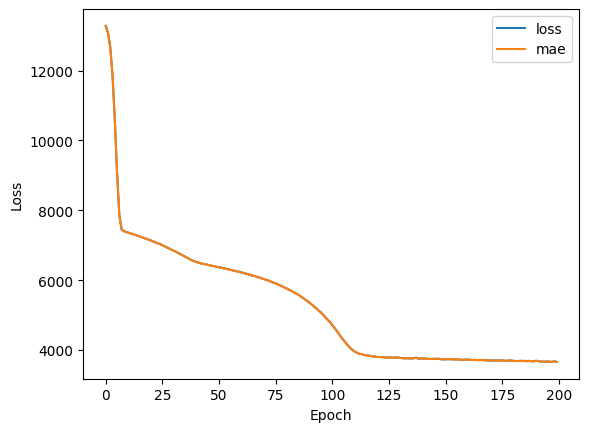

In [15]:
# Plot history (also known as as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch");

## **Preprocessing data (normalization and standardization)**

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("drive/MyDrive/TensorFlowDeveloperCertificate/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [18]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [19]:
# Check the shape
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Nice! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [25]:
#
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                          metrics=["mae"])

# Fit the model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 10763.3643 - mae: 10763.3643
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 6831.2451 - mae: 6831.2451
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 4078.9429 - mae: 4078.9429
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 3643.4536 - mae: 3643.4536
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 3576.2839 - mae: 3576.2839
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 3606.5190 - mae: 3606.5190
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3559.7319 - mae: 3559.7319
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 3585.0964 - mae: 3585.0964
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3566.4470 - mae: 3566.4470
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3596.4170 - mae: 3596.41

In [22]:
# Evaluate
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3441.4070 - mae: 3441.4070


[3441.406982421875, 3441.406982421875]